In [14]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np, scipy as sp, scipy.stats, os, sys, joblib
import os, numpy as np, scipy as sp, scipy.io, scipy.io.wavfile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random
import pandas as pd
import importlib
import useful_functions
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [20]:
 # Define the data and model foldes.
data_folder = r"../training_data"
model_folder = r"../model"
verbose = 3

In [67]:
importlib.reload(useful_functions)
from useful_functions import *

# Output one array per patient.
def create_rec_patient_list(data_f):
    # Find the patient data files.
    patient_files = find_patient_files(data_f)
    num_patient_files = len(patient_files)

    murmur_classes = ['Present', 'Absent']
    num_murmur_classes = len(murmur_classes)
    recordings = list()
    murmurs = list()
    id_list = list()

    #outcomes = list()
    for i in range(num_patient_files):
        # Load the current patient data and recordings.
        current_patient_data = load_patient_data(patient_files[i]) # load sex, height, weight, etc
        current_recordings = load_recordings(data_folder, current_patient_data) # convert recordings into signals
        current_patient_id = get_patient_id(current_patient_data)

        # Extract features.
        current_features = get_location_array(current_patient_data,current_recordings)
        #if len(current_recordings)!=0:
            #current_features = current_recordings # we keep first element of a list of one element


        # Extract labels and use one-hot encoding.
        #current_murmur = np.zeros(num_murmur_classes, dtype=int)
        current_murmur = 0
        murmur = get_murmur(current_patient_data)
        #if murmur in murmur_classes:
        if murmur == "Present":
            #j = murmur_classes.index(murmur)
            #current_murmur[j] = 1
            current_murmur=1

        # Takes only in account patient that have a "Present" or "Absent" murmur.
        if murmur != "Unknown" and len(current_recordings)!=0 :
            murmurs.append(current_murmur)
            recordings.append(current_features)
            id_list.append(current_patient_id)

    #features = np.asarray(features, dtype=np.float32)
    #murmurs = np.asarray(murmurs, dtype=np.float32)


    #X_train, X_test, y_train, y_test = train_test_split(features, murmurs, test_size=0.15, random_state=42)
    #return X_train, X_test, y_train, y_test
    return recordings,murmurs,id_list

In [68]:
recordings,patient_label,patient_id = create_rec_patient_list(data_folder)

In [75]:
importlib.reload(useful_functions)
from useful_functions import *
df = build_dataset_df(recordings,patient_id,patient_label)
df

,patient_id,recording_type,recording,murmur
0,2530.0,1.0,"[-425, 1045, 518, -674, -690, -588, -237, -276...",0.0
1,2530.0,1.0,"[145, 159, 246, 266, 257, 262, 176, 217, 359, ...",0.0
2,2530.0,1.0,"[371, 313, 3, -234, -337, -299, -130, -171, -1...",0.0
3,2530.0,1.0,"[-177, -226, -391, -167, -229, -659, -591, -46...",0.0
4,2530.0,1.0,"[-2441, -2268, -2150, -2154, -2143, -2007, -17...",0.0
...,...,...,...,...
68256,85349.0,4.0,"[-42, 530, 84, -139, 350, 30, 208, 107, 96, 42...",0.0
68257,85349.0,4.0,"[-157, -390, -666, -874, -890, -462, -542, -52...",0.0
68258,85349.0,4.0,"[293, 55, -196, 115, 392, 255, 158, 71, -33, 3...",0.0
68259,85349.0,4.0,"[600, 283, 263, 641, 370, -146, 435, 396, -108...",0.0


In [83]:
rec = recordings[0][3]

Text(0.5, 1.0, 'Normalized signal')

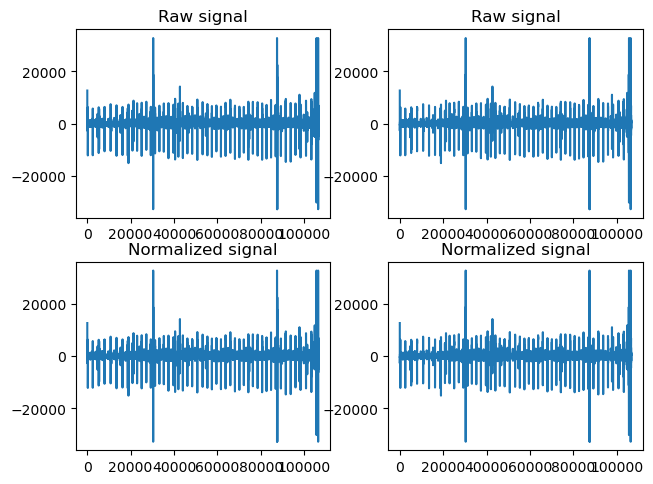

In [84]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
axs[0, 0].plot(rec)
axs[0, 0].set_title('Raw signal')
axs[0, 1].plot(rec)
axs[0, 1].set_title('Raw signal')
axs[1, 0].plot(rec)
axs[1, 0].set_title('Normalized signal')
axs[1, 1].plot(rec)
axs[1, 1].set_title('Normalized signal')

In [102]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
import matplotlib
matplotlib.use('nbagg')
fig, ax = plt.subplots(figsize=(9,5))
#fig.tight_layout()
ax.plot(rec)
ax.set_title('Raw signal')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Raw signal')